#Using Minimax with Alpha-Beta Pruning and Heuristic Evaluation to Solve 2048 game with Computer

This problem appeared as a project in the *edX course ColumbiaX: CSMM.101x Artificial Intelligence (AI)*. In this assignment, an agent will be implemented to intelligently play the 2048-puzzle game, using more advanced techniques to probe the search space than the simple informative / non-informative search methods. The online version of the game is available at gabrielecirulli.github.io/2048. An adversarial search algorithm will be implemented, one that plays the game intelligently, perhaps much more so than playing by hand.

The following description of the problem is taken from the course:

An instance of the 2048-puzzle game is played on a 4×4 grid, with numbered tiles that slide in all four directions when a player moves them. Every turn, a new tile will randomly appear in an empty spot on the board, with a value of either 2 or 4. Per the input direction given by the player, all tiles on the grid slide as far as possible in that direction, until they either (1) collide with another tile, or (2) collide with the edge of the grid. If two tiles of the same number collide while moving, they will merge into a single tile, valued at the sum of the two original tiles that collided. The resulting tile cannot merge with another tile again in the same move.

In [5]:
#ipython nbconvert pcaiso.ipynb
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

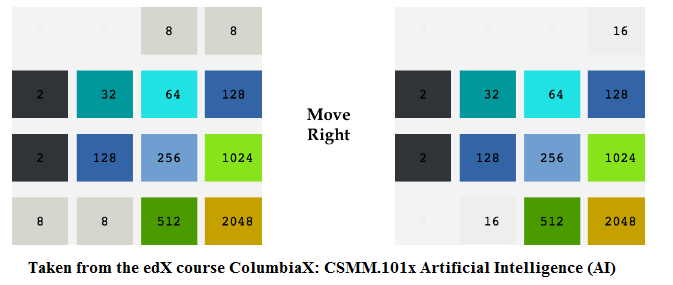

In [8]:
from IPython.display import Image
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week4\\demo.png')

With typical board games like chess, the two players in the game (i.e. the "Computer AI" and the "Player") take similar actions in their turn, and have similar objectives to achieve in the game. In the 2048-puzzle game, the setup is inherently asymmetric; that is, the computer and player take drastically different actions in their turns. Specifically, the computer is responsible for placing random tiles of 2 or 4 on the board, while the player is responsible for moving the pieces. However, adversarial search can be applied to this game just the same.

# The Minimax Algorithm

In the 2048-puzzle game, the computer AI is technically not "adversarial". In particular, all it does is spawn random tiles of 2 and 4 each turn, with a designated probability of either a 2 or a 4; it certainly does not specifically spawn tiles at the most inopportune locations to foil the player's progress. However, a "Player AI" can be created to play as if the computer is completely adversarial. In particular, in this article, the minimax algorithm will be employed by assuming that the computer player is adverserial. 

In game-playing we generally pick a strategy to employ. With the *minimax algorithm*, the strategy assumes that the computer opponent is perfect in minimizing the player's outcome. Whether or not the opponent is actually perfect in doing so is another question. As a general principle, how far the actual opponent's actual behavior deviates from the assumption certainly affects how well the AI performs. However, it can be seen that this strategy works well in this game. In this article, an optimized *minimax algorithm* implementation will be described.

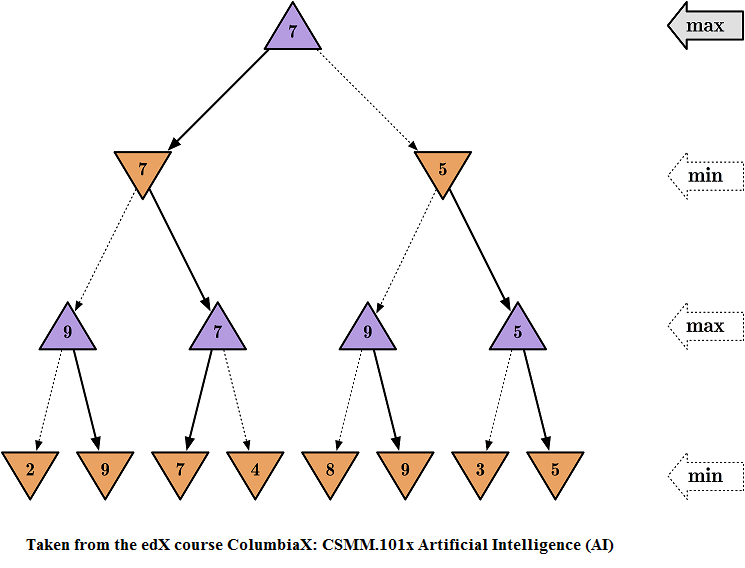

In [9]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week4\\demo2.png')

The Player AI agent to be implemented is allowed 0.1 seconds to come up with each move. The process continues until the game is over; that is, until no further legal moves can be made. At the end of the game, the maximum tile value on the board is printed.

As in the case of a simple game like tic-tac-toe, it is useful to employ the minimax algorithm, which assumes that the opponent is a perfect "minimizing" agent. In practice, however, we may encounter a sub-par opponent that makes silly moves. When this happens, the algorithm's assumption deviates from the actual opponent's behavior. In this case, it still leads to the desired outcome of never losing. However, if the deviation goes the other way (e.g. suppose we employ a "maximax" algorithm that assumes that the opponent wants us to win), then the outcome would certainly be different.

# The $\alpha-\beta$ pruning 

This needs to be implemented to speed up the search process by eliminating irrelevant branches. Since the search space is huge (the Player AI agent can take any of the 4 actions LEFT, RIGHT, TOP, DOWN and the Computer Player can choose any free tile randomly and fill it with either 2 or 4), it will be very expensive to search all the branches. 

# The Heuristic functions 

What is the maximum height of this game tree? Unlike elementary games like tic-tac-toe, in this game it is highly impracticable to search the entire depth of the theoretical game tree. To be able to cut off the search at any point (at some depth), a heuristic evaluation functions must be employed to assign approximate values to nodes in the tree. Since the time limit allowed for each move by the Player AI agent is small (0.1 seconds), so a systematic way to cut off the search before time runs out is necessary.

#The heuristic weights 
Since we likely want to include more than one heuristic evaluation functions, it will be needed to assign weights associated with each individual heuristic. Deciding on an appropriate set of weights will take careful reasoning, along with careful experimentation. The typical heuristic functions used use the following intuitive ideas:
1. Takes into account the *Monotonicity property*: this tries to ensure that there is no high value stacked in between the small values preventing the merging of the tiles and resulting in a premature end of the game with low score.
2. Takes into account the number of free tiles left: if there is low number of free available tiles, then it's likely that the game will end with low premature scores, so this heuristic tries to ensure that the player AI agent chooses the move that allows more free spaces by looking ahead.
3. A convex combination of this two hueristic functions are chosen.
4. The cut-off limit for the game-tree search space is typically set the at depth 3.

The following animation shows the Computer Player vs. the AI player agent with a score of 1024 for a certain choice of the heuristic weights.

In [11]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week4\\sol1.gif')

ValueError: Cannot embed the 'gif' image format

As can be seen, the soft assignments come closer to hard assignments as the $\beta$ parameter value is increased.
![](C:\\Work\\analytics\\R\\session.coord\\rpubs\\p29\\EMbeta1.1.gif)